## MCMC sampling of NVT ensemble.  Ising models and Metropolis-Hastings algorithm

In [63]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import ipywidgets as widgets


# Load scientific and plotting libraries 
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

from numpy.random import rand, random, randint, choice, normal, uniform 

### Estimate pi via direct MC

In [4]:
def directMC_pi(N=10000, plot=False):
    
    xs, ys = uniform(-1,1,size=N), uniform(-1,1,size=N)

    r = np.sqrt(xs**2 + ys**2)

    n_hits = np.sum(r<1) 
    
    pi_estimate = 4*n_hits/N


    if plot == 1:
        
        plt.figure(figsize=(6,6))
        plt.plot(xs[r<1],ys[r<1],'b.') # points inside are blue
        plt.plot(xs[r>1],ys[r>1],'g.') # points outside are red
        plt.title(f"Estimate of $\pi$ = {pi_estimate}",fontsize=15)
    
    return  4*n_hits/N

3.1528

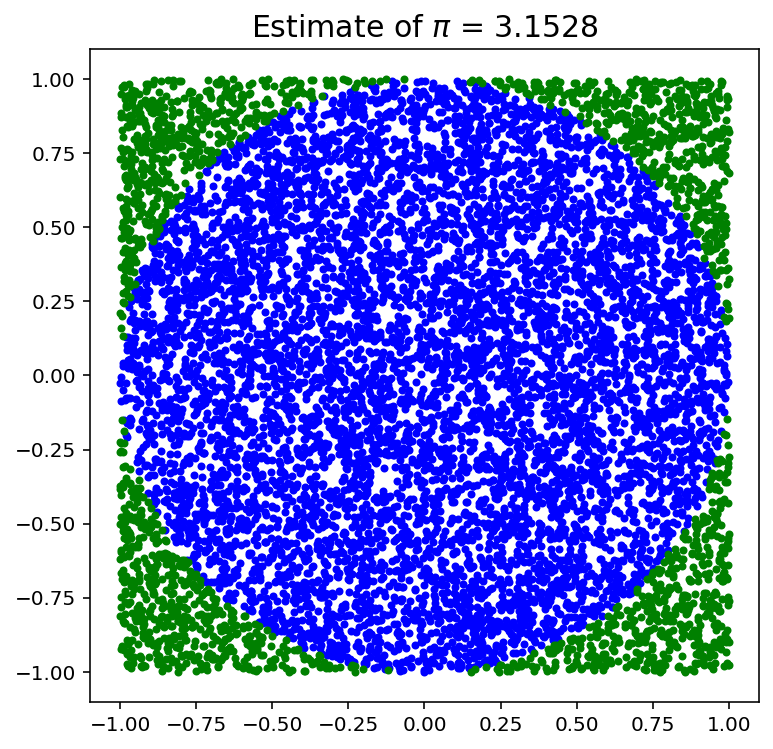

In [5]:
directMC_pi(plot=1)

Text(0.5, 1.0, 'Mean: 3.1425, Var: 0.0510')

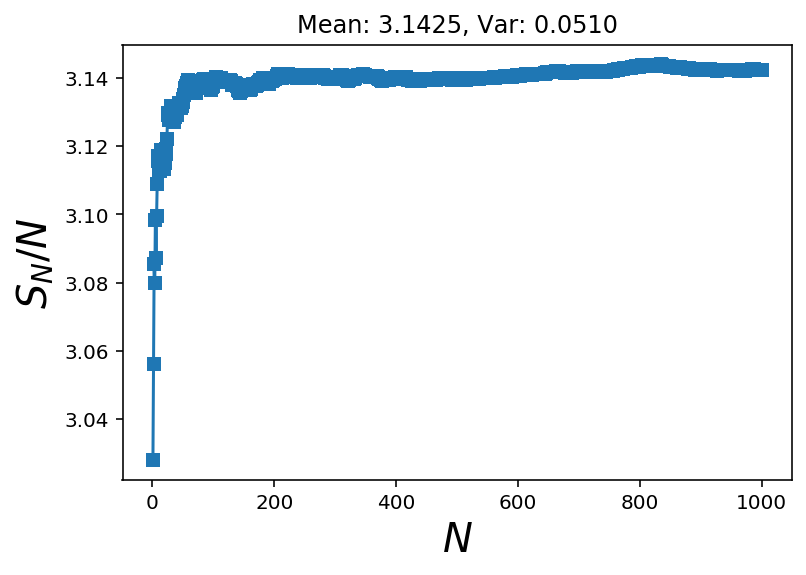

In [10]:
n_runs = 1000

pi      =  np.array( [directMC_pi(N=1000) for i in range(n_runs)]  )
 
sum_N = np.cumsum(pi)

plt.plot(np.arange(1,n_runs+1), sum_N/np.arange(1,n_runs+1), '-s')

plt.xlabel('$N$',fontsize=20)
plt.ylabel('$S_N/N$', fontsize=20)
plt.title( f"Mean: {np.mean(pi):.4f}, Var: {np.std(pi):.4f}" )

### Estimate $\pi$ via MCMC

In [11]:
def hastings_samples(N=1e5, delta=1.0):
    
    pts = [] # array for points in square
    
    r_old = uniform(-1, 1, size=2) # 2 points within [0, 1] for x and y

    for i in range(N):
        
        dr = uniform(-delta, delta, size=2)
        
        r_new = r_old + dr
        
        if np.max(r_new) <= 1.0 and np.min(r_new) >= -1.0:
            
            pts.append(r_new)
            
            r_old = r_new
    
    pts  = np.array(pts)
    hits = pts[np.sqrt(pts[:,0]**2+pts[:,1]**2) < 1]
    
    return pts, hits

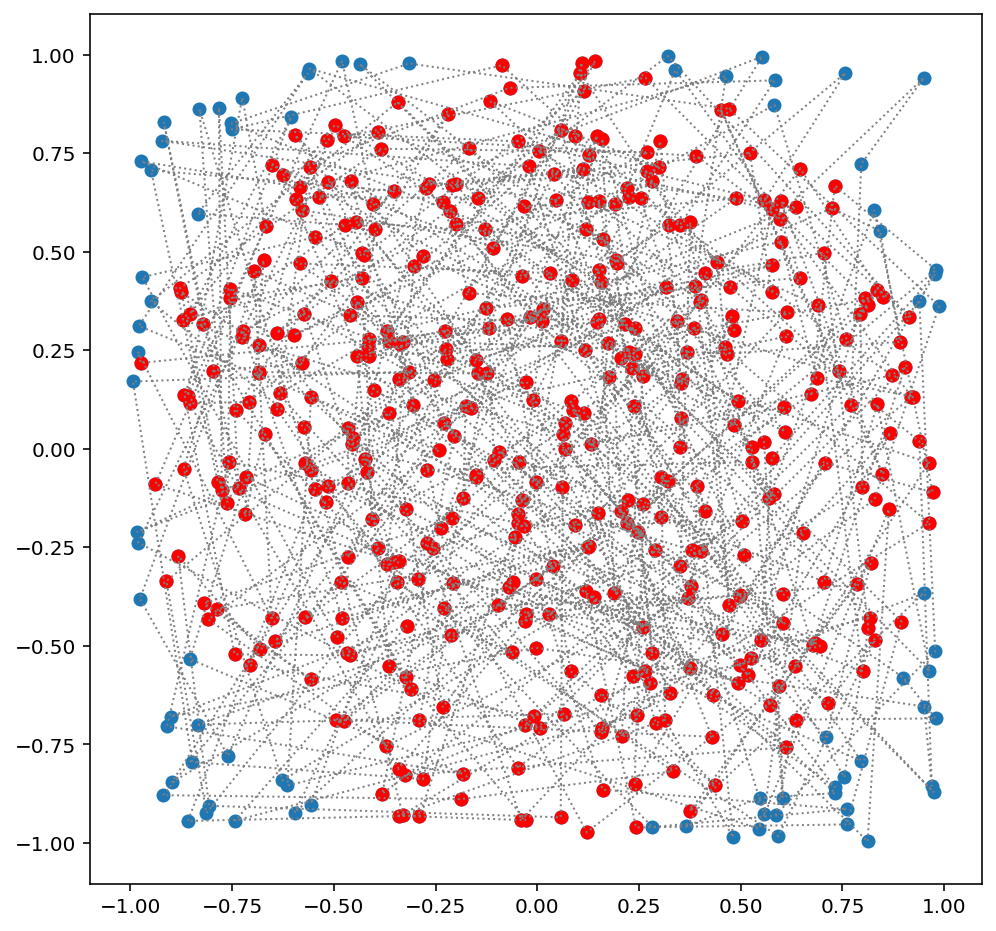

In [15]:
# Plot points
fig, ax = plt.subplots(figsize=(8,8))

pts, hits = hastings_samples(N=1000, delta=1)

ax.scatter(pts[:, 0], pts[:, 1])
ax.scatter(hits[:, 0], hits[:, 1], color='red')



# Plot paths
from matplotlib.path import Path
import matplotlib.patches as patches

n = len(pts)
path = Path(pts, [Path.MOVETO] + [Path.LINETO]*(n-1))

patch = patches.PathPatch(path, facecolor="none", edgecolor="grey", ls=":")
ax.add_patch(patch)

In [30]:
pts, hits = hastings_samples(N=100000, delta=0.1)

pi_value = 4 * len(hits) / len(pts)

print("Estimated Pi value is: ", pi_value)

Estimated Pi value is:  3.1958133265942212


<mark>**$\boxed{Exercsie!}$: Study dependence of variance on delta** </mark> 

## Ising models: The H atom of phase transitions

<br>

$$\boxed{H([s])= \sum_{\langle ij \rangle} J_{ij}s_i s_j - \mu B \sum_i s_i}$$

<br>


$$\boxed{Z=\sum_{[s]}e^{-H([s])/k_B T}}$$

[[-1  1 -1  1 -1 -1  1  1]
 [ 1  1 -1  1  1 -1 -1 -1]
 [ 1  1 -1  1 -1 -1 -1 -1]
 [ 1  1 -1 -1 -1  1  1 -1]
 [ 1 -1 -1 -1  1 -1 -1 -1]
 [-1  1 -1  1  1 -1 -1  1]
 [ 1 -1  1  1 -1  1 -1 -1]
 [-1  1  1  1 -1 -1 -1  1]]


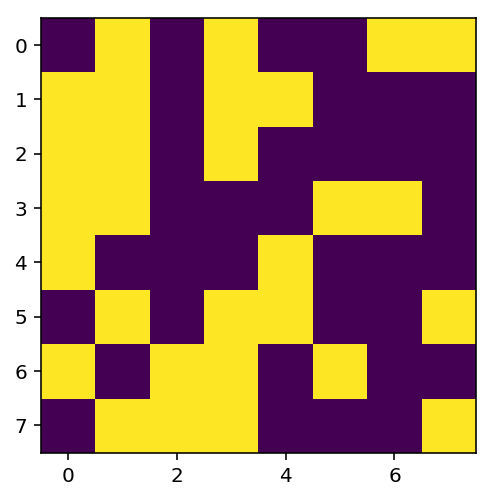

In [3]:
lattice = choice([-1,1],size=(8,8))

print(lattice)

plt.imshow(lattice)

In [4]:
lattice[:,:]

array([[-1,  1, -1,  1, -1, -1,  1,  1],
       [ 1,  1, -1,  1,  1, -1, -1, -1],
       [ 1,  1, -1,  1, -1, -1, -1, -1],
       [ 1,  1, -1, -1, -1,  1,  1, -1],
       [ 1, -1, -1, -1,  1, -1, -1, -1],
       [-1,  1, -1,  1,  1, -1, -1,  1],
       [ 1, -1,  1,  1, -1,  1, -1, -1],
       [-1,  1,  1,  1, -1, -1, -1,  1]])

In [13]:
N = 8
E = 0

for i in range(N-1):
    
    for j in range(N-1):
        
        E += lattice[i,j] * ( lattice[i,j+1] + lattice[i,j-1] + lattice[i+1,j] + lattice[i-1,j])

print(E)

-8


### Enforcing periodic boundary conditions

- **Method-1: Creating roll over indes using modulo operator %**

In [64]:
0%8, 1%8, 2%8, 3%8, 8%8
#lattice[8%8,5]

(0, 1, 2, 3, 0)

In [63]:
N = 8

for i in range(8):
    
    print(lattice[(i+1)%N , 3])

1
-1
-1
1
1
1
-1
1


In [ ]:
N = 8
E = 0

for i in range(N):
    
    for j in range(N):
        
        E += lattice[i,j] * ( lattice[(i+1)%N , j] + lattice[i,j-1] + lattice[i+1,j] + lattice[i-1,j])

print(E)

- **Method-2: Creating roll over indes using numpy roll function**

In [462]:
np.roll(lattice, 1, axis = 0)

array([[-1,  1, -1, -1,  1, -1,  1,  1],
       [-1,  1,  1, -1, -1,  1, -1, -1],
       [ 1,  1,  1,  1, -1, -1,  1, -1],
       [ 1,  1,  1,  1, -1, -1,  1,  1],
       [ 1,  1, -1, -1,  1,  1, -1,  1],
       [ 1, -1, -1,  1,  1, -1,  1, -1],
       [ 1, -1,  1, -1, -1,  1,  1,  1],
       [-1,  1, -1,  1, -1,  1,  1, -1]])

### Computing Thermodynamic quantities

#### Energy $E$

- **Energy of a configuration**

$$E[s] = H([s])= \sum_{\langle ij \rangle} J_{ij}s_i s_j - \mu B \sum_i s_i$$. 


- **Ensemble average Energy**

$$ \langle E \rangle \approx \frac{1}{n_{MC}} \sum^{i=n_{MC}}_{i=1} H[s_i] $$

#### Magnetization

- **Total magnetization, $M$**  

$$M([s])=\sum_is_i $$

- **Magnetization per spin $m$** 

$$m([s])=\frac{1}{N}\sum_is_i =\frac{M}{N}$$

- **Ensemble averaged Magnetization** 

$$\langle M \rangle  \approx \frac{1}{n_{MC}} \sum^{i=n_{MC}}_{i=1} M[s_i]$$

#### Heat capacity $C_v$

Heat capacity is again the familiar expression established in our treatment of canonical ensemble. 

$$ C_V(T) = \Big (\frac{\partial E}{\partial T} \Big )_V= \frac{1}{k_B T^2} \big(\langle E^2 \rangle-\langle E \rangle^2 \big) $$


#### Susceptibility $\chi$

Magnetic susceptibility quantifies response of the ssytem to the variation of magnetic field.

$$\chi_T=\Big (\frac{\partial M}{\partial B} \Big )_T= \frac{1}{k_B T} \big(\langle M^2 \rangle-\langle M \rangle^2 \big) $$

#### Correlation function $c(i,j)$  and correlation length

At high temperatures, spins on an ising lattice point up and down randomly. While at low temperatures, all spins tend to align. To quantify the degree of alignment, we can define a quantity named correlation length $\xi$, which can be defined mathematically through correlation function $c(i,j)$ 

$$c(i,j)=\langle s_i-\langle s_i\rangle\rangle \langle s_j-\langle s_j\rangle\rangle$$

#### Parition function and Free energy 


$$Z=\sum_{[s]}e^{-\beta H([s])}=\sum_{[s]}e^{-\beta \big ( \sum_{\langle ij \rangle} J_{ij}s_i s_j - \mu B M \big )}$$

<br><br>

$$F=-\beta^{-1} log Z $$

- **Free energy as a function of M (Potential of mean force)**

<br>

$$Z(M) = \sum_{[s]} e^{-\beta H([s])} \delta (M-M([s]))$$

$$F(M)=-\beta^{-1} log Z(M)$$

The  Z(M) is a partial sum over states for which magnetization is equal to a particular value M as opposed to Z where summation is unrestricted. 

In [14]:
def getE(spins,N,J,B):    
    
    '''Compute energy of spin lattice by lopping over each spin 
        with periodic boundary conditions enforced 
        via rollover index implemented using modulo operator %'''
    
    E = 0
    
    for i in range(N):
        for j in range(N):   
            
            z = spins[(i+1)%N, j] + spins[(i-1)%N, j] +\
                spins[i,(j+1)%N] +  spins[i,(j-1)%N]
            
            E += -J*z*spins[i,j]/4 # Since we overcounted interactions 4 times divide by 4.

    return E - B*np.sum(spins) #Field contribution added

In [15]:
def getEE(spins,N,J,B):
    
    '''Compute energy of spin lattice by lopping over each spin 
    with periodic boundary conditions enforced 
    via numpy roll''' 
    
    z = np.roll(spins, 1, axis = 0) + np.roll(spins, -1, axis = 0) + \
    np.roll(spins, 1, axis = 1) + np.roll(spins, -1, axis = 1)

    eij = -J*spins*z/4  
    
    return np.sum(eij) - B*np.sum(spins)

In [16]:
spins = choice([-1,1],size=(1000,1000))

In [17]:
%%timeit
ee = getE(spins, 1000, 1, 0)
#print(ee)

1.55 s ± 28.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [18]:
%%timeit
ee2 = getEE(spins, 1000, 1, 0)
#print(ee2)

8.21 ms ± 170 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [45]:
def getM(s):
    
    return np.mean(s)

In [49]:
def getC(Ei, T):
    
    Ei = np.array(Ei)
    return (np.var(Ei))/T**2

In [50]:
def getXi(Mi, T):
    
    Mi = np.array(Mi)
    
    return (np.var(Mi))/T

In [51]:
def getCorr(spins, N, i, j):
    
    pass

### Sampliing of Boltzmann distribution (NVT). MC vs MCMC

How to compute the expectation value of an observable $A$. In theory everything is simple:

$$P(E_i)=\frac{e^{-\beta E_i}}{Z} = \frac{e^{-\beta E_i}}{\sum_i e^{-\beta E_i}}$$

$$\langle A\rangle = \sum_i A_iP(E_i)$$

**1. Question: What we know and what we want to know?**
- We don't always know the **(micro)states** $i$ of a system.
- We only know **macroscopic quantities:** temperature $T$ with $\beta = 1/(k_BT)$, volume, etc.

**2. Answer: MC sampling**
- Simulate different states of the system with Monte Carlo, according to the thermal probability function

**3. What are challanges?**
- most probabilities $P(E_k)$ are tiny => exponentially small
- there is an extremely large number of possible states


**4. Concludion: We need Importance sampling!**

- Use the Boltzmann probability $P(E_i)$ as probability distribution to generate $N$ samples:

$$\boxed{\langle A\rangle \rightarrow\frac{1}{N}\sum_{i=1}^N \underbrace{A_i}_{{\rm chosen}\ {\rm acc.}\ {\rm to}\ P(E_i)}}$$

**MCMC Simulation** Generating random walks in configuration space of thte system states.  

### Master Equation and Detailed Balance

**Random process:**

$$P(X_1, X_2, ... X_N) = P_1(X_1)\cdot P_2(X_2)... P_1(X_N)$$

<br>

**Probabilities**

$$P(X_1)$$

$$\sum_{X'} P(X') =1$$

**Markov chain:**

$$p(X_1, X_2, ... X_N) = P_1(X_1)\cdot P_2(X_2| X_1) \cdot P_2(X_3| X_2)... P_1(X_N | X_{N-1})$$

<br>

**Conditional (transition) probabilities:**

$$T(X_1 \rightarrow X_2) = P(X_2|X_1)$$

$$\sum_{X'} T(X\rightarrow X') =1 $$

**Probability of being at $X$ at $t+\Delta t$ given prior state at $(X',t)$**

$$P(X, t+\Delta t) = \sum_X' P(X', t) T(X' \rightarrow X, t)$$

**Master equation: A continuity equation in probability space.**

$$P(X, t+\Delta t) -P(X,t)= \sum_X' P(X', t) T(X' \rightarrow X, t) - P(X, t)\sum_{X'} T(X\rightarrow X')$$

$$\boxed{\frac{\partial P(X,t)}{\partial t} = \sum_X' P(X', t) w(X' \rightarrow X, t) - \sum_{X'} P(X, t) w(X\rightarrow X')}$$

- $w(X' \rightarrow X, t) = lim_{\Delta t \rightarrow 0}\frac{T(X' \rightarrow X, t)}{\Delta t}$

### Detailed Balance = Equilibrium

<br>

$$\boxed{\frac{\partial P(X,t)}{\partial t}  = \sum_{X'} P(X', t) w_{X'X} - \sum_{X'} P(X, t) w_{X X'}}=0$$

<br>

$$\boxed{ p_i w_{ij} = p_j w_{ji}  }$$

**Master equation for a two state dynamics**

$$\frac{dP(x_1,t)}{dt} = p_1 w_{12} - p_2 w_{21}$$

$$\frac{dP(x_2,t)}{dt} = p_2 w_{21} - p_1 w_{12}$$

### How to pick the moves for Markov chain?

$$[transition] = [move] \cdot [acceptance]$$

$$T(X\rightarrow X') = \alpha_{X X'}\cdot A_{X X'} $$

- $\alpha_{X X'}\geq 0$, $\alpha_{X X'} = \alpha_{X' X}$
<br>

- If $p(X') < p(X)$, $A_{XX'}=\frac{p(X')}{p(X)}$
<br>

- If $p(X') \geq p(X)$, $A_{XX'}=1$

**For 2D Ising model of size $(L,L)$**

- $\alpha_{X X'} = \frac{1}{L^2}$ 

Where $X$ and $X'$ differ in one spin configuration.

## Metropolis algorithm

${\bf i. Initialization.}$ Generate some initiaal configuration for spins $[s_0]=(s_1,...s_N)$. For instnace Choosing random orientation for each spins $(+1, -1)$ or giving them  the same orientation. 

${\bf ii. Attempt\,\, spin\,\, flip.\,\,}$ Pick a spin at random and flip it. E.g multiply by -1 so that +1 state becomes -1 and vice versa. this generated a new configuration $[s_1]$

${\bf iii. Acceptance/Rejection}$ Evaluate energy differene between old configuration $[s_{0}]$ and new one $[s_{1}]$ with flipped spin which has created in previous step. The $\Delta E=E_{1}-E_{0}$ is used for deciding weather the move is accepted or rejected in a way that is consistent with Boltzman distribution: 

$$w=\frac{P[s_{1}]}{P[s_{0}]}=exp\big(-\beta[E_{1}-E_{0}] \big ) $$

This is done by generating a unifor random number $r$ between $[0,1]$ and 

(a) if $r  \leq w$ Accept the spin flip thereby keeping $[s_1]$ and proceeding to try new spin flip via step ii.  

(b) if $r  > w$ reject the spin flip and set  $[s_1]=[s_0]$ and proceeding to try a new spin flip via step ii.

In [46]:
def initialize(N):
    
    '''Create square lattice of spin states, stored as 2D numpy array'''  
                        
    spins = choice([-1, 1], size=(N, N))  
    
    return spins    
    

def get_dE(spins, N, J, B, i, j): 
    
    '''Compute energy difference betwee old and spin flipped configuration.
    Peridoic boundary conditions have been imposed. 
    Study this function carefully and understand the meaning of each term'''
    
    z = spins[(i-1)%N, j] + spins[(i+1)%N, j] + spins[i, (j-1)%N] + spins[i, (j+1)%N]
    
    return 2*spins[i,j]*(J*z + B)


def mcmc(spins, N, J, B, T):
    
    ''' Attempt a flip of a randomly chosen spin at ij location of lattice''' 
    
    i, j = choice(N), choice(N)
    
    deltaE = get_dE(spins, N, J, B, i, j)
    
    
    if deltaE < 0:
        
        '''For negative dE always accept'''
        
        spins[i,j] *= -1
            
    elif np.exp(-deltaE/T) > random():
        
        '''For positive dE distribute acceptance according to Boltzman dist'''
        
        spins[i,j] *= -1
    
    return spins

Text(0,0.5,'spin, $ s_j$')

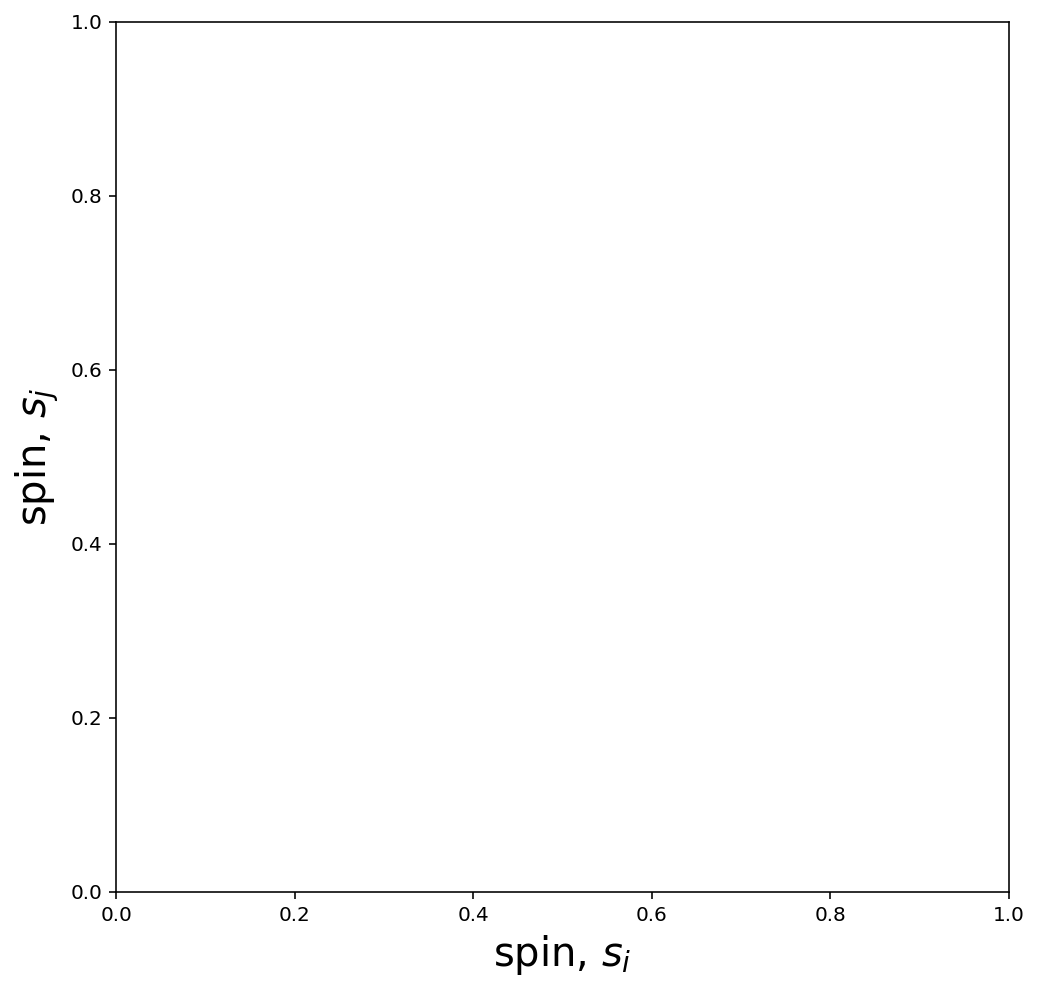

In [66]:
N=250
J=1
B=0
n_mcsteps = 1000

T = 0.5  # Try different temps. For J=1 vary T between 1-3 to see qualitative change. 

''' We run the Monte Carlo using a loop of n_mcsteps iterations. Later one we can create a more 
sophisticated object oriented code where one can simply execute single command. '''

spins = initialize(N)

for n in range(n_mcsteps):
    
    spins = mcmc(spins, N, J, B, T)

# Plot the lattice before and after
fig,ax=plt.subplots(figsize=(8,8))

ax.set_xlabel('spin, $ s_i$',fontsize=20)
ax.set_ylabel('spin, $ s_j$',fontsize=20)

#im = ax.imshow(spins)

In [287]:
N = 64
J = 1
B = 0
T = 2.5  

n_steps = 100000
spins = initialize(N)

images=[]

In [285]:
for i in range(n_steps):
    
    images.append(spins.copy()) # use copy becasue spins keep on being updates
    
    spins = mcmc(spins, N, J, B, T)

In [286]:
@widgets.interact(i=(0,n_steps-1))
def plot_image(i=0):
    plt.imshow(images[i])

interactive(children=(IntSlider(value=0, description='i', max=99999), Output()), _dom_classes=('widget-interac…

In [100]:
N=10
J=1
B=0
n_mcsteps = 1000
n_mcsteps2 = 20000

T = 1  # Try different temps. For J=1 vary T between 1-3 to see qualitative change. 

''' Record some observables form simulation and plot as a function of time to visually inspect equilibration'''

obs, obs2, obs3,  = [], [], []


spins = initialize(N)

for n in range(n_mcsteps):
    
    spins = mcmc(spins, N, J, B, T)

for n in range(n_mcsteps2):
    
    spins = mcmc(spins, N, J, B, T)
    
    obs.append(np.mean(spins))
    
#    obs2.append(spins[1,5])
    #obs3.append(getE(spins,N,J,B))

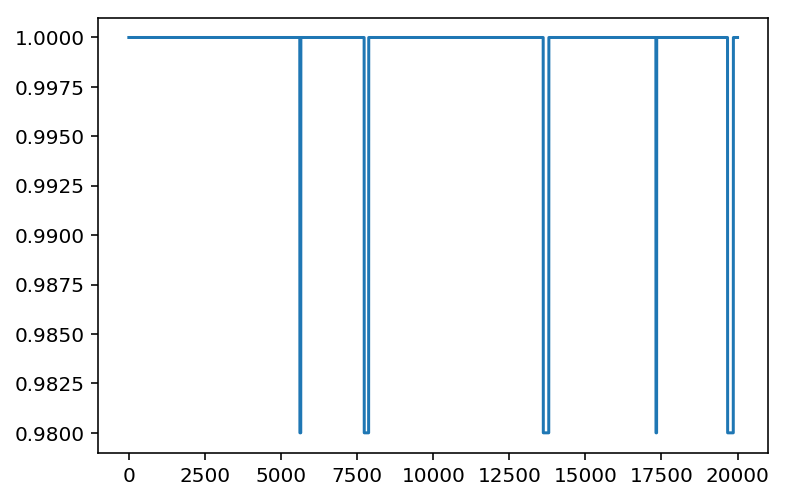

In [101]:
plt.plot(obs)

### Carry out explorative simulations

$\bf{i.}$ Test the dependence of observables on system size.

$\bf{ii.}$ Test the dependence of observables on initital conditions.

$\bf{iii.}$ Vary intensive parameters, e.g temperature and field strength. Investigate changes in observables such as magnetization, energy, susceptibility, heat capacity.

$\bf{iv.}$ How do we know if simulation has done enough sampling? How do we assess covnergence and errors? 

$\bf{v.}$ Think about alternative ways of accelerating and enhancing the sampling.

#### Parameter sweeps: run MC simulatons  of 2D Ising model at different  Ts

For more rigirous analysis we can either optimize the code (using cython or numba) or run on HPCs. 

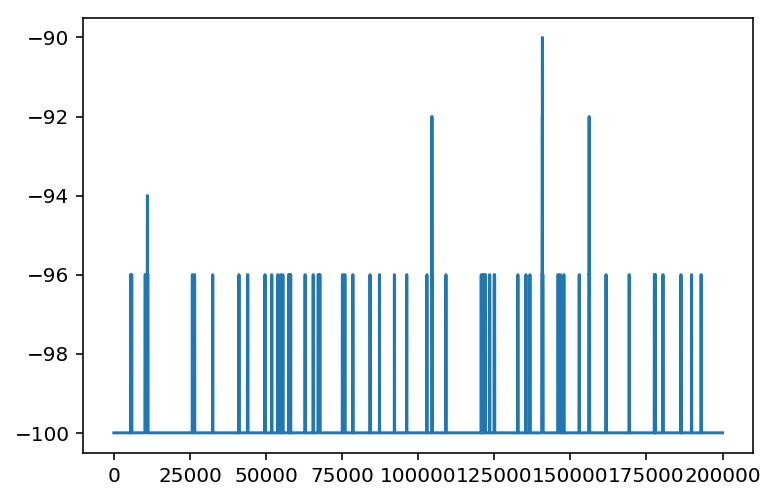

In [43]:
plt.plot(obs3)

In [52]:
N = 10                       # Small trial system, e.g 10-20 spins
J = 1
B=0
Ts = np.linspace(1, 4, 50) #vary temp

n_mcsteps=10000   # Equilibrate!
n_mcsteps2=10000   # Collect data!


'''Carry out mulitple MC runs at differnet Temperatures. This calculation may take ~5 mins.  
    Think about equilibration, convergence and statistical errors'''

Es, Ms = [], []
Cs, Xis = [], []   

for T in Ts:
    
    Ei,Mi=[],[]
    spins = initialize(N)
    
    for n in np.arange(n_mcsteps):
        
        spins = mcmc(spins, N, J, B, T)
    
    for n in np.arange(n_mcsteps2):  
        
        spins = mcmc(spins, N, J, B, T)
        
        Ei.append(getE(spins,N, J, B))
        Mi.append(getM(spins))
 

    # First L steps discarded as equilibration
    Es.append(np.mean(Ei))
    Ms.append(np.mean(Mi))
    
    # C and Xi computed from energies 
    Cs.append(getC(Ei, T))
    Xis.append(getXi(Ei, T))

Text(0,0.5,'Energy E')

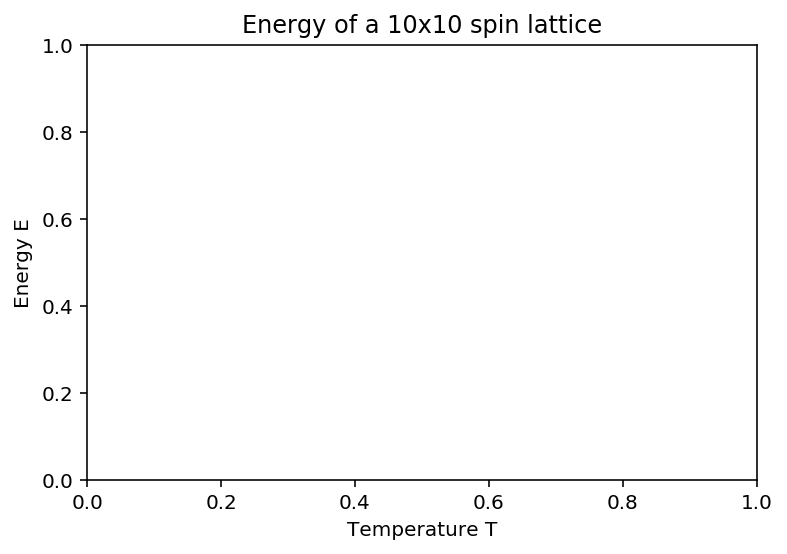

In [60]:
#plt.scatter(Ts, Es,color='blue')
plt.title("Energy of a %dx%d spin lattice"%(N,N))
plt.xlabel("Temperature T")
plt.ylabel("Energy E")

Text(0,0.5,'Magnetization M')

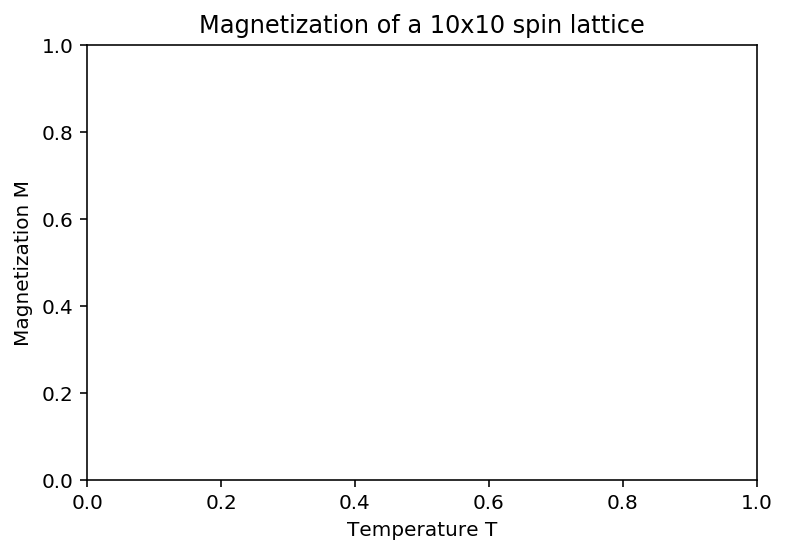

In [59]:
#plt.scatter(Ts, Ms,color='green')
plt.title("Magnetization of a %dx%d spin lattice"%(N,N))
plt.xlabel("Temperature T")
plt.ylabel("Magnetization M")

Text(0,0.5,'Heat capacity $C_v(T)$')

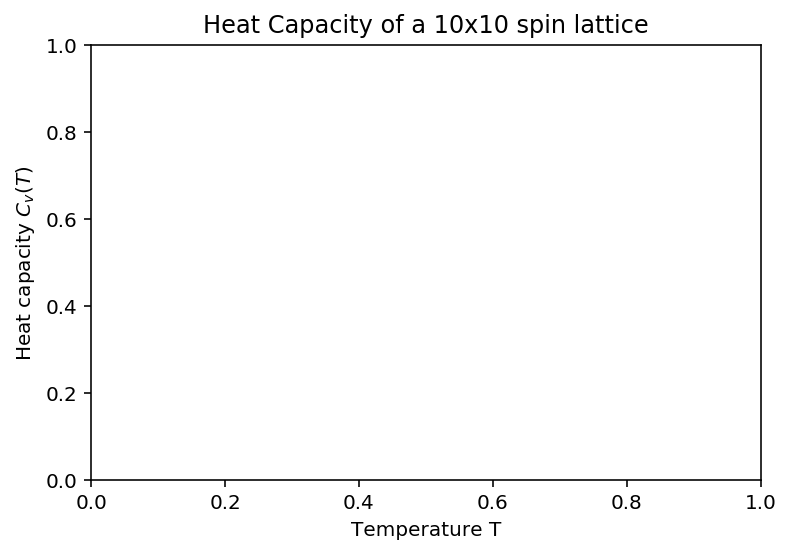

In [58]:
#plt.scatter(Ts, Cs,color='red')
plt.title("Heat Capacity of a %dx%d spin lattice"%(N,N))
plt.xlabel("Temperature T")
plt.ylabel("Heat capacity $C_v(T)$")

Text(0,0.5,'Susceptibility $\\Xi(T)$')

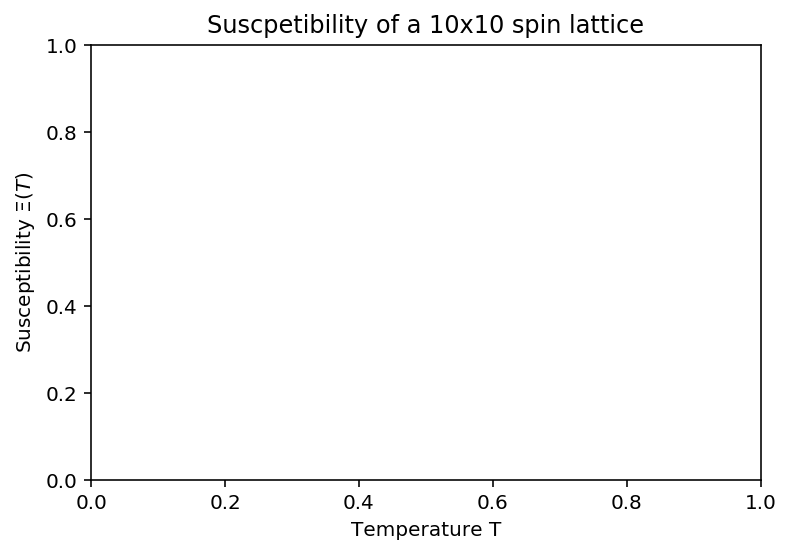

In [57]:
#plt.scatter(Ts, Xis,color='gold')
plt.title("Suscpetibility of a %dx%d spin lattice"%(N,N))
plt.xlabel("Temperature T")
plt.ylabel("Susceptibility $\Xi(T)$")

###  Simulated annealing

Monte Carlo technique for the **numerical optimization** of functions

Original paper: [S. Kirkpatrick, C. D. Gelatt, Jr., M. P. Vecchi, Science 220, 671-680 (1983)](http://science.sciencemag.org/content/220/4598/671.long)

Remember: it is difficult to find the **global** extremum of a function

Idea: Monte Carlo search of the function domain

Finding thermal ground state (energy minimum) of a statistical system $\leftrightarrow$ finding minimum (or similarly maximum) of any function

- introduce (artificial) temperature parameter $T$
- Metropolis algorithm with acceptance probability min$(1, e^{-\Delta f/T})$
- here $f$ can be any function we want to minimize (not only energy)
- for maximum simply change the sign: min$(1, e^{+\Delta f/T})$
- slowly reduce the temperature

This **slow cooling** is the main idea of simulated annealing

very high $T$                                |   very low $T$
---------------------------------------------|------------------------------------
almost all updates are accepted              | only updates that decrease the energy are accepted
random configurations/explore entire space   | descend towards minimum 
high energy                                  | low energy but might get stuck in local minimum
  
- if we slowly cool from high $T$ to low $T$ we will explore the entire space until we converge to the (hopefully) global minimum
- success is not guaranteed, but the methods works very well with good cooling schemes

Inspiration: annealing in metallurgy

![Annealing a silver strip](images/Annealing_a_silver_strip.JPG)

Image source: [Wikipedia](https://commons.wikimedia.org/wiki/File:Annealing_a_silver_strip.JPG), by Mauro Cateb, CC BY-SA 3.0

This is a great method to tackle **NP-hard** optimization problems, such as the traveling salesman!

#### Cooling schedules

- slow cooling is essential: otherwise the system will "freeze" into a local minimum
- but too slow cooling is inefficient...
- initial temperature should be high enough so that the system is essentially random and equilibrates quickly
- final temperature should be small enough so that we are essentially in the ground state (system no longer changes)
- exponential **cooling schedule** is commonly used

  $$T(t)=T_0e^{-t/\tau},$$
  
  where $t$ is the Monte Carlo time and the constant $\tau$ needs to be determined (usually empirically)
  
- alternative cooling schedules:

  linear: $T(t)=T_0 - t/\tau$ (also widely used)
  
  logarithmic: $T(t) = c/\log(1+t/\tau)$

  
**Example:** global minimum of the function $f(x) = x^2 -\cos (4\pi x)$

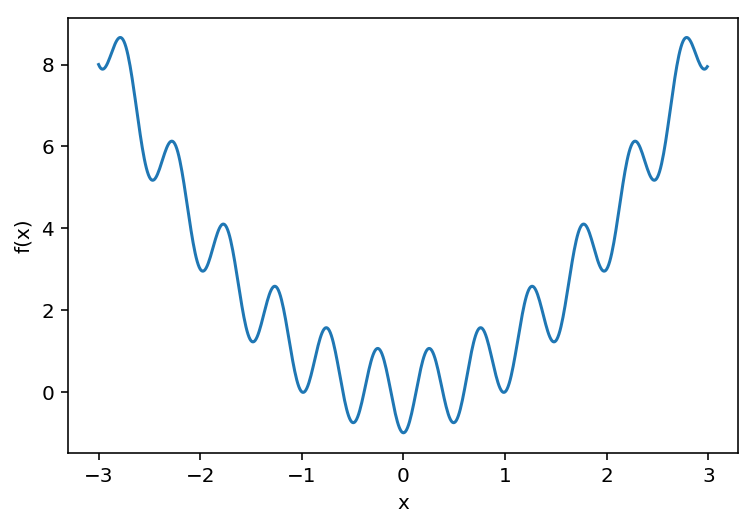

In [211]:
def f(x):
    return x*x - np.cos(4*np.pi*x)

xplot = np.arange(-3,3,0.01)
plt.plot(xplot, f(xplot))
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()
# the global minimum is at x = 0

In [212]:
# global minimum search using simulated annealing

x = 2                 # start value for x
temperature = 10.0    # initial temperature
tempmin = 1e-4        # minimal temperature (stop annealing when this is reached)
cooltime = 1e4        # cooling time tau for exponential schedule
xlog = []             # list storing generated x-values
mean = 0              # parameter for MC update
sigma = 1             # parameter for MC update

# after every MC step we reduce the temperature
# alternatively we could only reduce it every N steps
def cool(temperature):
    return temperature*np.exp(-1/cooltime)

def MCupdate(x):
    # the new suggested x-value is the old one plus a Gaussian random number
    # this means we are trying to make a small step away from the old value
    xnew = x + np.random.normal(mean, sigma)
    
    # check if we accept the update -> Metropolis probability
    accept = False
    delta_f = f(xnew) - f(x)
    if delta_f < 0:
        accept = True
    else:
        prob = np.exp(-delta_f/temperature)
        if np.random.rand() < prob:
            accept = True
            
    if accept == True:
        x = xnew
        
    return x

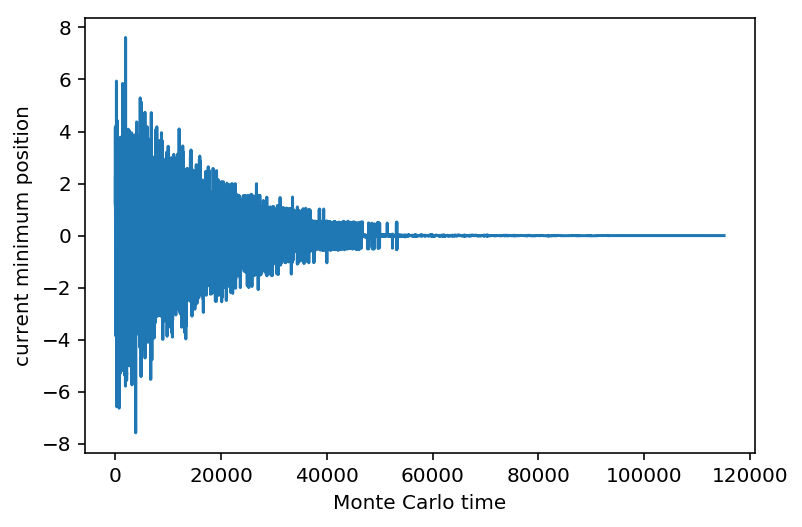

Final search result for the global minimum:  0.0001678544055979357


In [213]:
# main code for simulated annealing search

while temperature > tempmin:
    # update x-value with Metropolis algorithm
    x = MCupdate(x)
    # cool the system
    temperature = cool(temperature)
    # collect the x-value
    xlog.append(x)

# output results
plt.plot(xlog)
plt.xlabel('Monte Carlo time')
plt.ylabel('current minimum position')
plt.show()
print('Final search result for the global minimum: ', x)

In this example: minimum of a continuous function

=> always slightly above true minimum if $T>0$

=> best combined with a steepest descent method

In [288]:
# Set up simulated annealing for MCMC 2D Ising model

temperature = 10.0    # initial temperature
tempmin = 1e-4        # minimal temperature (stop annealing when this is reached)
cooltime = 1e4        # cooling time tau for exponential schedule

# how long it will take to cool to minimal temperature in MC steps
MCtime = -cooltime*np.log(tempmin/temperature)

# after every MC step we reduce the temperature
def cool(temperature):
    
    return temperature*np.exp(-1/cooltime)

### Parallel tempering

Simulated annealing is not guaranteed to find the global extremum (unless you cool infinitely slowly)

=> usually need to repeat search

Automate this: parallel tempering (also called **replica exchange Markov chain Monte Carlo**)

- simulate several copies of the system in parallel
- each copy is at a different constant temperature $T$
- usual Metropolis updates for each copy
- every certain number of steps attempt to exchange copies at neighboring temperatures
- exchange acceptance probability is min(1, $e^{-\Delta f\Delta\beta}$)
- if temperature difference small enough, the energy histograms of the copies will overlap

  ![Parallel tempering histogram overlap](images/paralleltemperingoverlap.jpeg)

  Image from [this article](https://aip.scitation.org/doi/10.1063/1.3592153)

Advantages:

- exchanges allow to explore different extrema
- more successful for complex functions/energy landscapes
- they also ensure detailed balance (regular simulated annealing breaks detailed balance)

=> random walk in temperature space

Temperature distributions:

- a dense temperature grid increases the exchange acceptance rates...
- ...but takes longer to simulate and more steps are needed to move from one temperature to another
- there are many options, often trial and error is needed
     - exchange acceptance probability should be between about 20% and 80%
     - exchange acceptance probability should be approximately temperature-independent
     - commonly used: geometric progression
     
       $$T_n = T_{\rm min}\left(\frac{T_{\rm max}}{T_{\rm min}}\right)^{\frac{n-1}{N-1}}$$
       
       for $N$ temperatures $T_n$ between and including $T_{\rm min}$ and $T_{\rm max}$
       
       (ensures more steps around $T_{\rm min}$)
       
- make sure to spend enough time before swapping to achieve equilibrium